# Image Processing_01
- Band extraction and normalization
- RGB exposure augmentation
- Noise filtering
- Band combination
- Edge detection
- False Color display

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel
from skimage import exposure

In [62]:
exp_img = "../RP1_Mamba_Unet/dataset/OpenEarthMap/OpenEarthMap_wo_xBD/aachen/images/aachen_3.tif"

## 1. Band Extraction & Normalization
- Insights: Remote sensing image may have multiple bands (not just 3). The tested dataset Openstreetmap only has 3 bands. In the future, I would try to find some images with more bands.

In [85]:
with rasterio.open(exp_img) as dataset:
    print("Band Counts:", dataset.count)
    print("Resolution:", dataset.res)
    print("Coordinates:", dataset.crs)
    img = dataset.read()
red_band = img[0]
green_band = img[1]
blue_band = img[2]
raw_img = np.dstack((red_band, green_band, blue_band))

Band Counts: 3
Resolution: (0.5, 0.5)
Coordinates: EPSG:25832


In [86]:
def normalize_band(band):
    return (band - np.min(band)) / (np.max(band) - np.min(band))

In [87]:
norm_red = normalize_band(red_band)
norm_green = normalize_band(green_band)
norm_blue = normalize_band(blue_band)
# get the normalized image
norm_img = np.dstack((norm_red, norm_green, norm_blue))

## 2. Noise Filtering
- Insights: Normalization, better for subsequent learning for neural networks

In [92]:
smoothed_red = gaussian_filter(norm_red, sigma=1)
smoothed_green = gaussian_filter(norm_green, sigma=1)
smoothed_blue = gaussian_filter(norm_blue, sigma=1)
smooth_img = np.dstack((smoothed_red, smoothed_green, smoothed_blue))

## 3. Exposure Augmentation
- Insights: The augmentation effect is not obvious compared with HSV.

In [89]:
equalized_red = exposure.equalize_hist(norm_red)
equalized_green = exposure.equalize_hist(norm_green)
equalized_blue = exposure.equalize_hist(norm_blue)
exposure_img = np.dstack((equalized_red, equalized_green, equalized_blue))

## 4. Sharpening and Edge Detection
- Insights: Compared with Canny, its edge detection seems to be less clearer.

In [95]:
edges_red = sobel(norm_red)
edges_green = sobel(norm_green)
edges_blue = sobel(norm_blue)
edges_img = np.dstack((edges_red, edges_green, edges_blue))

## Overall display

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.098039215686274..3.207843137254902].


Text(0.5, 1.0, 'False color Image')

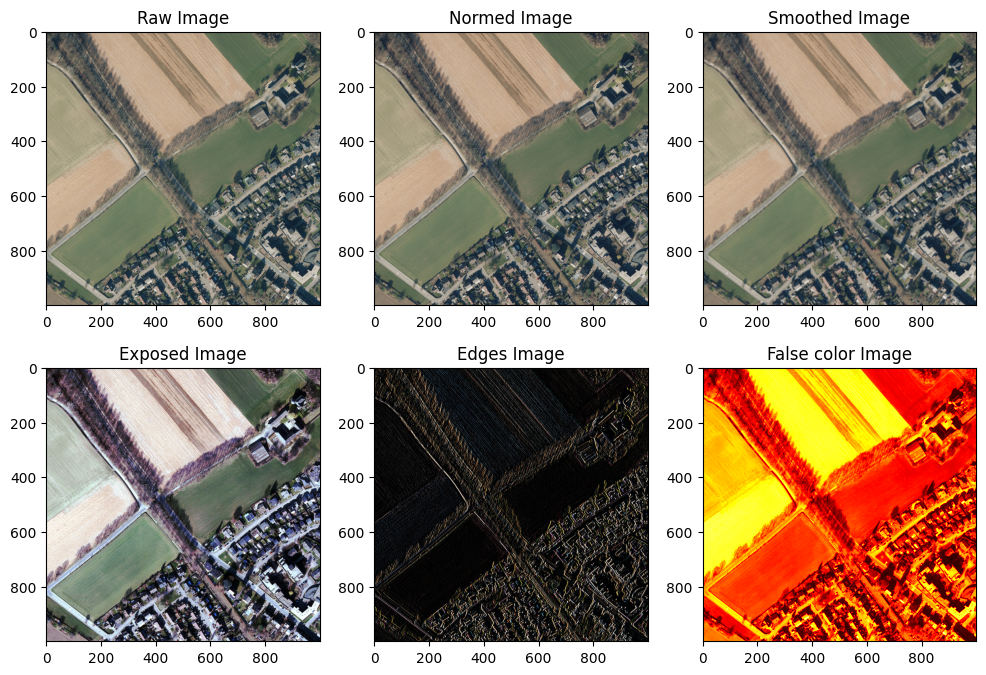

In [99]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0, 0].imshow(raw_img, cmap='gray')
ax[0, 0].set_title('Raw Image')
ax[0, 1].imshow(norm_img, cmap='gray')
ax[0, 1].set_title('Normed Image')
ax[0, 2].imshow(smooth_img, cmap='gray')
ax[0, 2].set_title('Smoothed Image')


ax[1, 0].imshow(exposure_img, cmap='gray')
ax[1, 0].set_title('Exposed Image')
ax[1, 1].imshow(edges_img, cmap='gray')
ax[1, 1].set_title('Edges Image')
ax[1, 2].imshow(red_band, cmap='hot')
ax[1, 2].set_title('False color Image')